In [1]:
!pip install unidecode
!pip install --upgrade matplotlib
!pip install tldextract
!pip install python-whois
#!pip install Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.4 MB/s 
     |████████████████████████████████| 930 kB 52.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91 kB 3.9 MB/s 
  Created wheel for python-whois: filename=python_whois-0.7.3-py3-none-any.whl size=87720 sha256=39796142c1971f69ca6856d452849ee01778e5d464febdd49462a081bace9429
  Stored in directory: /root/.cache/pip/wheels/11/05/f7/895ce5a73665f77c8274a7d55e34fb3e6b4abbb9a7637e215b
Successfully built python-whois


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tqdm
import pickle
import pandas as pd 
import numpy as np
import re
import gensim
from unidecode import unidecode
from collections import Counter
from urllib.parse import urlparse
import tldextract
import ipaddress as ip 
import nltk
from nltk.corpus import stopwords
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import whois
from datetime import datetime
from PIL import Image

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Load data

In [ ]:
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/data.pkl", "rb") as f:
    data = pickle.load(f)

# Function for LEXICAL


In [ ]:
# Method to count number of dots
def dot_count(url):
  return url.count('.')

# Method to count number of semicolons
def semicol_count(url):
  return url.count(';')

# Method to count number of ampersand
def ampersand_count(url):
  return url.count('&')

# Method to count number of slash
def slash_count(url):
  return url.count('/')

# Method to count number of hyphen
def hyphen_count(url):
  return url.count('-')

# Method to count number of underscore
def under_count(url):
  return url.count('_')

# Method to count number of equal
def equal_count(url):
  return url.count('=')

# Method to count number of ?
def question_count(url):
  return url.count('?')

# Method to count number of @
def at_count(url):
  return url.count('@')

# Method to count number of digit in url
def digit_count(url):
  return len(re.findall('\d', url))

# Function for HOST-BASED


In [ ]:
'''def host_based_https(path):
  if path.scheme == 'https':
    return 1
  else:
    return 0'''

In [ ]:
'''def host_based_http(path):
  if path.scheme == 'http':
    return 1
  else:
    return 0'''

# Function for DOMAIN


In [ ]:
# Check if the domain starts with a number
def dom_number(ext):
  if ext.domain[0].isdigit():
    return 1
  else:
    return 0
# Check if it is IP
def isip(uri):
    try:
        if ip.ip_address(uri):
            return 1
    except:
        return 0
# Check the TLD
def tld_com(ext):
  if ext.suffix == 'com':
    return 1
  else:
    return 0
def tld_org(ext):
  if ext.suffix == 'org':
    return 1
  else:
    return 0
def tld_gov(ext):
  if ext.suffix == 'gov':
    return 1
  else:
    return 0
def tld_net(ext):
  if ext.suffix == 'net':
    return 1
  else:
    return 0

In [ ]:
def getFeatures(url, label):
  result = []
  
  #add the url to feature set
  result.append(url)

  #parse the URL and extract the domain information
  path = urlparse(url)
  ext = tldextract.extract(url)

#LEXICAL FEATURES
  result.append(dot_count(url))    
  result.append(semicol_count(url))
  result.append(ampersand_count(url))
  result.append(slash_count(url))
  result.append(hyphen_count(url))
  result.append(under_count(url))
  result.append(equal_count(url))
  result.append(question_count(url))
  result.append(at_count(url))
  result.append(digit_count(url))
  
# DOMAIN FEATURE 
  result.append(len(url))   
  result.append(isip(ext.domain))
  result.append(dom_number(ext))
  result.append(tld_com(ext))
  result.append(tld_org(ext))
  result.append(tld_gov(ext))
  result.append(tld_net(ext))

  result.append(str(label))
  return result

In [ ]:
featureSet = pd.DataFrame(columns=('url',
                                   'dots',
                                   'semicolons',
                                   'ampersand',
                                   'slash',
                                   'hypen',
                                   'underscore',
                                   'equal',
                                   'question mark',
                                   'at',
                                   'digit',

                                   'len of URL',
                                   'is IP',
                                   'starts with number',
                                   'com',
                                   'org',
                                   'gov',
                                   'net',

                                   
                                
                                   'label'))

In [ ]:
for i in range(len(data)):
  features = getFeatures(data['Link'].loc[i], data['Label'].loc[i])
  featureSet.loc[i] = features

In [ ]:
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/featureSet.pkl", "wb") as f:
    pickle.dump(featureSet, f)

In [ ]:
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/featureSet.pkl", "rb") as f:
    featureSet = pickle.load(f)

In [ ]:
featureSet.head(5)

,url,dots,semicolons,ampersand,slash,hypen,underscore,equal,question mark,at,digit,len of URL,is IP,starts with number,com,org,gov,net,label
0,https://dailyhive.com/vancouver/ryan-reynolds-...,1,0,0,4,4,0,0,0,0,2,66,0,0,1,0,0,0,1
1,https://www.livescience.com/china-coronavirus-...,3,0,0,3,4,0,0,0,0,0,68,0,0,1,0,0,0,0
2,https://cenerva.com/the-5g-covid-19-quackery/,1,0,0,4,4,0,0,0,0,3,45,0,0,1,0,0,0,0
3,https://pubmed.ncbi.nlm.nih.gov/32064853/,4,0,0,4,0,0,0,0,0,8,41,0,0,0,0,1,0,0
4,https://journals.usm.ac.id/index.php/the-messe...,4,0,0,7,1,0,0,0,0,4,68,0,0,0,0,0,0,0


In [ ]:
feat = ['dots', 'semicolons', 'ampersand', 'slash',	'hypen',	'underscore',	'equal',	'question mark', 'at',	'digit',	'len of URL',	'is IP',	'starts with number',	'com',	'org',	'gov',	'net']
for i in feat:
  print(featureSet.groupby('label')[i].mean())

label
0    2.172983
1    1.917293
Name: dots, dtype: float64
label
0    0.0
1    0.0
Name: semicolons, dtype: float64
label
0    0.003887
1    0.000000
Name: ampersand, dtype: float64
label
0    5.574344
1    5.135338
Name: slash, dtype: float64
label
0    6.719145
1    9.240602
Name: hypen, dtype: float64
label
0    0.088435
1    0.127820
Name: underscore, dtype: float64
label
0    0.017493
1    0.037594
Name: equal, dtype: float64
label
0    0.014577
1    0.037594
Name: question mark, dtype: float64
label
0    0.000000
1    0.007519
Name: at, dtype: float64
label
0    6.617104
1    6.150376
Name: digit, dtype: float64
label
0     89.572400
1    104.172932
Name: len of URL, dtype: float64
label
0    0.0
1    0.0
Name: is IP, dtype: float64
label
0    0.000972
1    0.007519
Name: starts with number, dtype: float64
label
0    0.652089
1    0.751880
Name: com, dtype: float64
label
0    0.106900
1    0.082707
Name: org, dtype: float64
label
0    0.056365
1    0.007519
Name: gov, dtype: fl

In [ ]:
for i in feat:
  print(featureSet.groupby('label')[i].sem())

label
0    0.021417
1    0.067542
Name: dots, dtype: float64
label
0    0.0
1    0.0
Name: semicolons, dtype: float64
label
0    0.003072
1    0.000000
Name: ampersand, dtype: float64
label
0    0.051279
1    0.128428
Name: slash, dtype: float64
label
0    0.153344
1    0.466117
Name: hypen, dtype: float64
label
0    0.022697
1    0.080167
Name: underscore, dtype: float64
label
0    0.005473
1    0.016556
Name: equal, dtype: float64
label
0    0.003738
1    0.016556
Name: question mark, dtype: float64
label
0    0.000000
1    0.007519
Name: at, dtype: float64
label
0    0.16087
1    0.44272
Name: digit, dtype: float64
label
0    1.039569
1    2.821703
Name: len of URL, dtype: float64
label
0    0.0
1    0.0
Name: is IP, dtype: float64
label
0    0.000972
1    0.007519
Name: starts with number, dtype: float64
label
0    0.014856
1    0.037594
Name: com, dtype: float64
label
0    0.009637
1    0.023974
Name: org, dtype: float64
label
0    0.007193
1    0.007519
Name: gov, dtype: float64




---



---



In [ ]:
# extract domain
def domain(domain_name):
  site_domain = domain_name.domain_name

  if site_domain is None:
    return 0
  elif type(site_domain) is list:
    for name in site_domain:
      return name
  else:
    return site_domain

In [ ]:
# Extract creation date
def creation_date(domain_name):
  creation_date = domain_name.creation_date

  if creation_date is None:
    return 0
  elif type(creation_date) is str:
    if 'before Aug' in creation_date:
      creation_date = datetime.strptime(creation_date,'before %b-%Y')
      return creation_date.year
  elif type(creation_date) is list:
    for l in creation_date:
      l = datetime.strptime(str(l), '%Y-%m-%d %H:%M:%S')
      return l.year
  else:
    if len(str(creation_date)) > 19:
      creation_date = datetime.strptime(str(creation_date),'%Y-%m-%d %H:%M:%S.%f')
      return creation_date.year
    else:
      creation_date = datetime.strptime(str(creation_date),'%Y-%m-%d %H:%M:%S')
      return creation_date.year

In [ ]:
def extract_country(domain_name):
  country_name = domain_name.country

  if country_name is None:
    return 0
  elif type(country_name) is list:
    for c in country_name:
      return c
  else:
    return domain_name.country

In [ ]:
def get_info_url(url, label):
  result_info = []

  #parse the URL and extract the domain information
  domain_name = whois.whois(url)

  result_info.append(domain(domain_name))
  result_info.append(creation_date(domain_name))
  result_info.append(extract_country(domain_name))
  

  result_info.append(str(label))
  return result_info

In [ ]:
url_info = pd.DataFrame(columns=('domain',
                                   'year_creation',
                                   'country',
                                   'label'))

In [ ]:
for i in range(len(data)):
  data_features = get_info_url(data['Link'].loc[i], data['Label'].loc[i])
  url_info.loc[i] = data_features

Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


In [ ]:
url_info["year_creation"] = url_info.year_creation.astype(float)

In [ ]:
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/url_info.pkl", "wb") as f:
    pickle.dump(url_info, f)



---



---



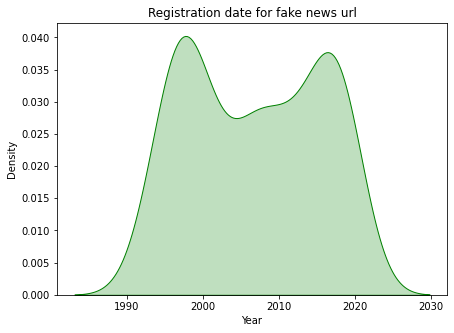

In [ ]:
fake_site = url_info.query("label == '1'")
fake_site = fake_site[fake_site['year_creation'] != 0]
# Plot formatting
f, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(fake_site['year_creation'], color="Green", shade=True)
plt.title('Registration date for fake news url')
plt.xlabel('Year')
plt.ylabel('Density')
f.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/fake_year_dist.png')

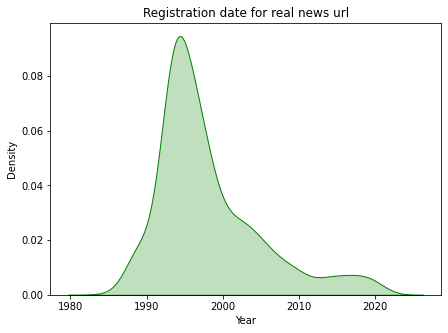

In [ ]:
real_site = url_info.query("label == '0'")
real_site = real_site[real_site['year_creation'] != 0]
#Plot formatting
f, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(real_site['year_creation'], color="green", shade=True)
plt.title('Registration date for real news url')
plt.xlabel('Year')
plt.ylabel('Density')
#plt.show()
f.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/real_year_dist.png')

In [ ]:
url_stat = url_info[url_info['year_creation'] != 0]

In [ ]:
url_stat.groupby("label")['year_creation'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,876.0,1998.090183,6.835360,1985.0,1994.00,1996.0,2001.0,2021.0
1,126.0,2006.809524,8.652134,1993.0,1998.25,2007.0,2016.0,2020.0


In [ ]:
print(real_site['year_creation'].median())
fake_site['year_creation'].median()

1996.0


2007.0



---



---



In [ ]:
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/url_info.pkl", "rb") as f:
     url_info = pickle.load(f)

In [ ]:
fake_country = url_info.query("label == '1'")
fake_country = fake_country[fake_country['country'] != 0]

In [ ]:
count_fake = fake_country.groupby('country')['domain'].nunique()
count_fake

In [ ]:
real_country = url_info.query("label == '0'")
real_country = real_country[real_country['country'] != 0]
count_real = real_country.groupby('country')['domain'].nunique()
count_real